In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#! /usr/bin/env python
# -*- coding: UTF-8 -*-
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import keras
import datetime
date_string = datetime.datetime.now().strftime("%H:%M / %d-%m-%Y")

In [0]:
#Loading the dataset
def loadDataset():
    dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/emotion_textCalısmaları/malayaDataset.data")
    return dataset
dataset =loadDataset()
#Separation of words.
input_sentences = [text.split(" ") for text in dataset["text"].values.tolist()]
labels = dataset["emotions"].values.tolist()

In [0]:
# Initialize word2id and label2id dictionaries that will be used to encode words and labels
word2id = dict()
label2id = dict()
max_words = 0 # maximum number of words in a sentence
# Construction of word2id dict
for sentence in input_sentences:
    for word in sentence: 
        # Add words to word2id dict if not exist.
        if word not in word2id:
            word2id[word] = len(word2id)
    # If length of the sentence is greater than max_words, update max_words
    if len(sentence) > max_words:
        max_words = len(sentence)   
        
# Construction of label2id and id2label dicts
label2id = {'fear': 0, 'joy': 1, 'sadness': 2, 'anger': 3, 'surprise': 4, 'love': 5} 
# Since the label sequence in the model is different from the code, the label sequence has been changed manually.
id2label = {v: k for k, v in label2id.items()}
f = open('labelDict.txt','a')
f.write(str(label2id)+'>>>'+date_string+'\n')
f.close()

In [17]:
from keras.models import load_model
model = load_model("/content/drive/My Drive/Colab Notebooks/emotion_textCalısmaları/TextEmotionLSTM-0408(epch150).h5")#server model epochs 150
# Re-create the model to get attention vectors as well as label prediction
model_with_attentions = keras.Model(inputs=model.input,
                                    outputs=[model.output, 
                                             model.get_layer('attention_vec').output])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




Enter text here:
University is very nice.
{'fear': 9.881269e-06, 'joy': 87.51446, 'sadness': 0.060126975, 'anger': 0.21629421, 'surprise': 6.062629e-11, 'love': 12.209115}


<Figure size 640x480 with 0 Axes>

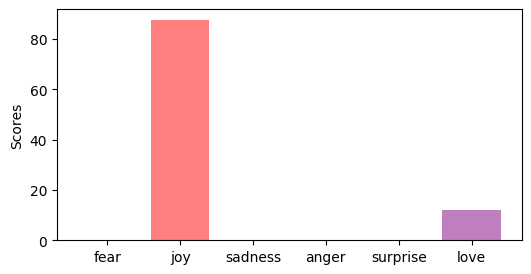

'\nI am sorry for you.\nSoftware engineering is a very entertaining field.\nI am happy today.\nUniversity is very nice.  554545,,;..\n\n'

In [44]:
import math
import re

try:
      # enter text
      text = input("Enter text here:\n")
      sample_text =  (re.sub('[^A-Za-z]+', ' ', text)).lower().strip()

      # Encode samples
      tokenized_sample = sample_text.split(" ")
      encoded_samples = [[word2id[word] for word in tokenized_sample]]

      # Padding
      encoded_samples = keras.preprocessing.sequence.pad_sequences(encoded_samples, maxlen=max_words)

      # Make predictions
      label_probs, attentions = model_with_attentions.predict(encoded_samples)
      label_probs = {id2label[_id]: prob for (label, _id), prob in zip(label2id.items(),(label_probs[0])*100)}
      print(label_probs)

      # Get word attentions using attenion vector
      token_attention_dic = {}
      max_score = 0.0
      min_score = 0.0
      for token, attention_score in zip(tokenized_sample, attentions[0][-len(tokenized_sample):]):
          token_attention_dic[token] = math.sqrt(attention_score)

      # VISUALIZATION
      import matplotlib.pyplot as plt; plt.rcdefaults()
      from IPython.core.display import display, HTML
      fig = plt.figure()
      def rgb_to_hex(rgb):
          return '#%02x%02x%02x' % rgb

      def attention2color(attention_score):
          r = 255 - int(attention_score * 255)
          color = rgb_to_hex((255, r, r))
          return str(color)

      # Build HTML String to viualize attentions
      html_text = "<hr><p style='font-size: large'><b>Text:  </b>"
      for token, attention in token_attention_dic.items():
          html_text += "<span style='background-color:{};'>{} <span> ".format(attention2color(attention),
                                                                              token)
      html_text += "</p>"
      # Display text enriched with attention scores 
      display(HTML(html_text))
      # PLOT EMOTION SCORES
      emotions = [label for label, _ in label_probs.items()]
      scores = [score for _, score in label_probs.items()]
      plt.figure(figsize=(6,3))
      plt.bar(np.arange(len(emotions)), scores, align='center', alpha=0.5, color=['black', 'red', 'green', 'blue', 'cyan', "purple"])
      plt.xticks(np.arange(len(emotions)), emotions )
      plt.ylabel('Scores')
      plt.show()
      fig.savefig("Text Emotion score(3107).png")

      f = open('processedTextList.txt','a')
      f.write('\nText:'+ text + '\nLabel Score: '+ str(label_probs) + '\nTransaction Date: ' + date_string + '\n')
      f.close()
except KeyError as e:
      print ('Bilinmeyen bir giris')

"""
I am sorry for you.
Software engineering is a very entertaining field.
I am happy today.
University is very nice.  554545,,;..

"""
